In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import time

import ipywidgets as widgets
from ipywidgets import interact
from IPython.core.display import display

%matplotlib inline

## Creating dataframe 

In [2]:
# csv containing Q_table
Q_Table_nonfoveated = pd.read_csv('Q_tables/Q_table_nonfoveated.csv', sep=',')
Q_Table_strong = pd.read_csv('Q_tables/Q_table_strongfoveated.csv', sep=',')
Q_Table_weak = pd.read_csv('Q_tables/Q_table_weakfoveated.csv', sep=',')

nonfoveated = Q_Table_nonfoveated['score']

strong_center = Q_Table_strong['(5, 5)']
strong_mean = Q_Table_strong.mean(axis=1)
strong_std = Q_Table_strong.std(axis=1)
weak_center = Q_Table_weak['(5, 5)']
weak_mean = Q_Table_weak.mean(axis=1)
weak_std = Q_Table_weak.std(axis=1)

# first element of each row is the name
strong_random = pd.Series([np.random.choice(i[1:]) for i in Q_Table_strong.values])
strong_min = pd.Series([np.min(i[1:]) for i in Q_Table_strong.values])
weak_random = pd.Series([np.random.choice(i[1:]) for i in Q_Table_weak.values])
weak_min = pd.Series([np.min(i[1:]) for i in Q_Table_weak.values])

df = pd.concat([nonfoveated, strong_center, strong_random, strong_min, strong_mean, strong_std, 
                weak_center, weak_random, weak_min, weak_mean, weak_std], axis=1)
df.columns = ['nonfoveated', 'strong_center', 'strong_random', 'strong_min', 'strong_mean', 'strong_std', 
              'weak_center', 'weak_random', 'weak_min', 'weak_mean', 'weak_std']
print(df.head(5))

   nonfoveated  strong_center  strong_random  strong_min  strong_mean  \
0     0.000876       0.423583       4.995119    0.423583     2.985313   
1     0.000200       0.876008       0.751626    0.196425     1.777198   
2     0.000903       3.360202       7.092012    3.360202     6.284949   
3     0.293198       6.084228       6.506428    4.752276     7.529555   
4     0.126650       5.714087       4.455384    1.972432     4.333951   

   strong_std  weak_center  weak_random  weak_min  weak_mean  weak_std  
0    1.469869     0.002218     0.047105  0.000349   0.084672  0.142489  
1    1.270369     0.002384     0.294148  0.001883   0.076758  0.155156  
2    1.093000     0.061000     0.061000  0.005068   1.920881  1.904206  
3    1.622062     0.687513     0.687513  0.687513   1.329307  0.459307  
4    1.224535     0.622785     0.151855  0.033303   0.285762  0.202173  


# Plots



## No foveation

In [6]:
result = df

def plot_fig(cutoff_left, cutoff_right, show, fov_strength):
    fig=plt.figure(figsize=(20,10), dpi=200, facecolor='w', edgecolor='k')
    
    nonfoveated = result['nonfoveated'][cutoff_left:cutoff_right]
    index = result.index.tolist()[cutoff_left:cutoff_right]
    
    foveated = result['weak_min']
    mean = result['weak_mean']
    std = result ['weak_std']
    if fov_strength == "strong":
        foveated = result['strong_min']
        mean = result['strong_mean']
        std = result ['strong_std']
        
    foveated = foveated[cutoff_left:cutoff_right]
    mean = mean[cutoff_left:cutoff_right]
    std = std[cutoff_left:cutoff_right]
    
    
    if show == "foveation & no foveation":
        plt.plot(foveated, 'go', markersize=5, fillstyle='none')
        plt.plot(nonfoveated, 'ro', markersize=2)
        plt.legend(['foveation', 'no foveation'])
    elif show == "mean & no foveation":
        plt.plot(nonfoveated, 'ro', markersize=2)
        plt.errorbar(x=index, y=mean, yerr=std, linestyle='None', marker='s', ms=1, mew=4, lw=1)
        plt.legend(['no foveation', 'foveated mean with SD'])
    elif show == "foveation & mean":
        plt.plot(foveated, 'go', markersize=5, fillstyle='none')
        plt.errorbar(x=index, y=mean, yerr=std, linestyle='None', marker='s', ms=1, mew=4, lw=1)
        plt.legend(['foveation', 'foveated mean with SD'])
    else: # all
        plt.plot(foveated, 'go', markersize=5, fillstyle='none')
        plt.plot(nonfoveated, 'ro', markersize=2)
        plt.errorbar(x=index, y=mean, yerr=std, linestyle='None', marker='s', ms=1, mew=4, lw=1)
        plt.legend(['foveation', 'no foveation', 'foveated mean with SD'])

    plt.ylabel('cross-entropy loss')
    plt.xlabel('images')
    
    plt.show()
    fig.savefig("images/foveation vs no-foveation", bbox_inches='tight')

def update(sortby, cutoff_left, cutoff_right, sort_ascending, show, fov_strength):
    global result
    
    if not sortby == 'nonfoveated':
        sortby = fov_strength + '_' + sortby
  
    result = df.sort_values(sortby, ascending=sort_ascending).reset_index(drop=True)
    plot_fig(cutoff_left, cutoff_right, show, fov_strength)
    
interact(update, 
         sortby=['nonfoveated', 'min', 'mean', 'std'],
         fov_strength=['weak', 'strong'],
         show=['foveation & no foveation', 'mean & no foveation', 'foveation & mean', 'all'],
         cutoff_left=widgets.IntSlider(value=0, min=0.0, max=len(result)),
         cutoff_right=widgets.IntSlider(value=len(result), min=0.0, max=len(result)),
        sort_ascending=False)


interactive(children=(Dropdown(description='sortby', options=('nonfoveated', 'min', 'mean', 'std'), value='non…

<function __main__.update(sortby, cutoff_left, cutoff_right, sort_ascending, show, fov_strength)>

In [7]:
def update(cutoff, verbose=True):
    nonfoveated = result['nonfoveated'][:cutoff]
    mean = result['weak_mean'][:cutoff]
    minimum = result['weak_min'][:cutoff]
    
    percentage_mean = 100 * sum(mean < nonfoveated)/ len(nonfoveated)
    percentage_min = 100 * sum(minimum < nonfoveated)/ len(nonfoveated)

    if verbose:
        print("percentage of foveated images that are on average better then nonfoveated:", percentage_mean, '%')
        print("percentage of foveated images that are on at best better then nonfoveated:", percentage_min, '%')
    else:
        return percentage_mean, percentage_min
    
interact(update, cutoff = widgets.IntSlider(value=len(result), min=1, max=len(result)))



interactive(children=(IntSlider(value=6500, description='cutoff', max=6500, min=1), Checkbox(value=True, descr…

<function __main__.update(cutoff, verbose=True)>

In [8]:
percentages_mean , percentages_min = zip(*[update(i, verbose=False) for i in range(1, len(result))])

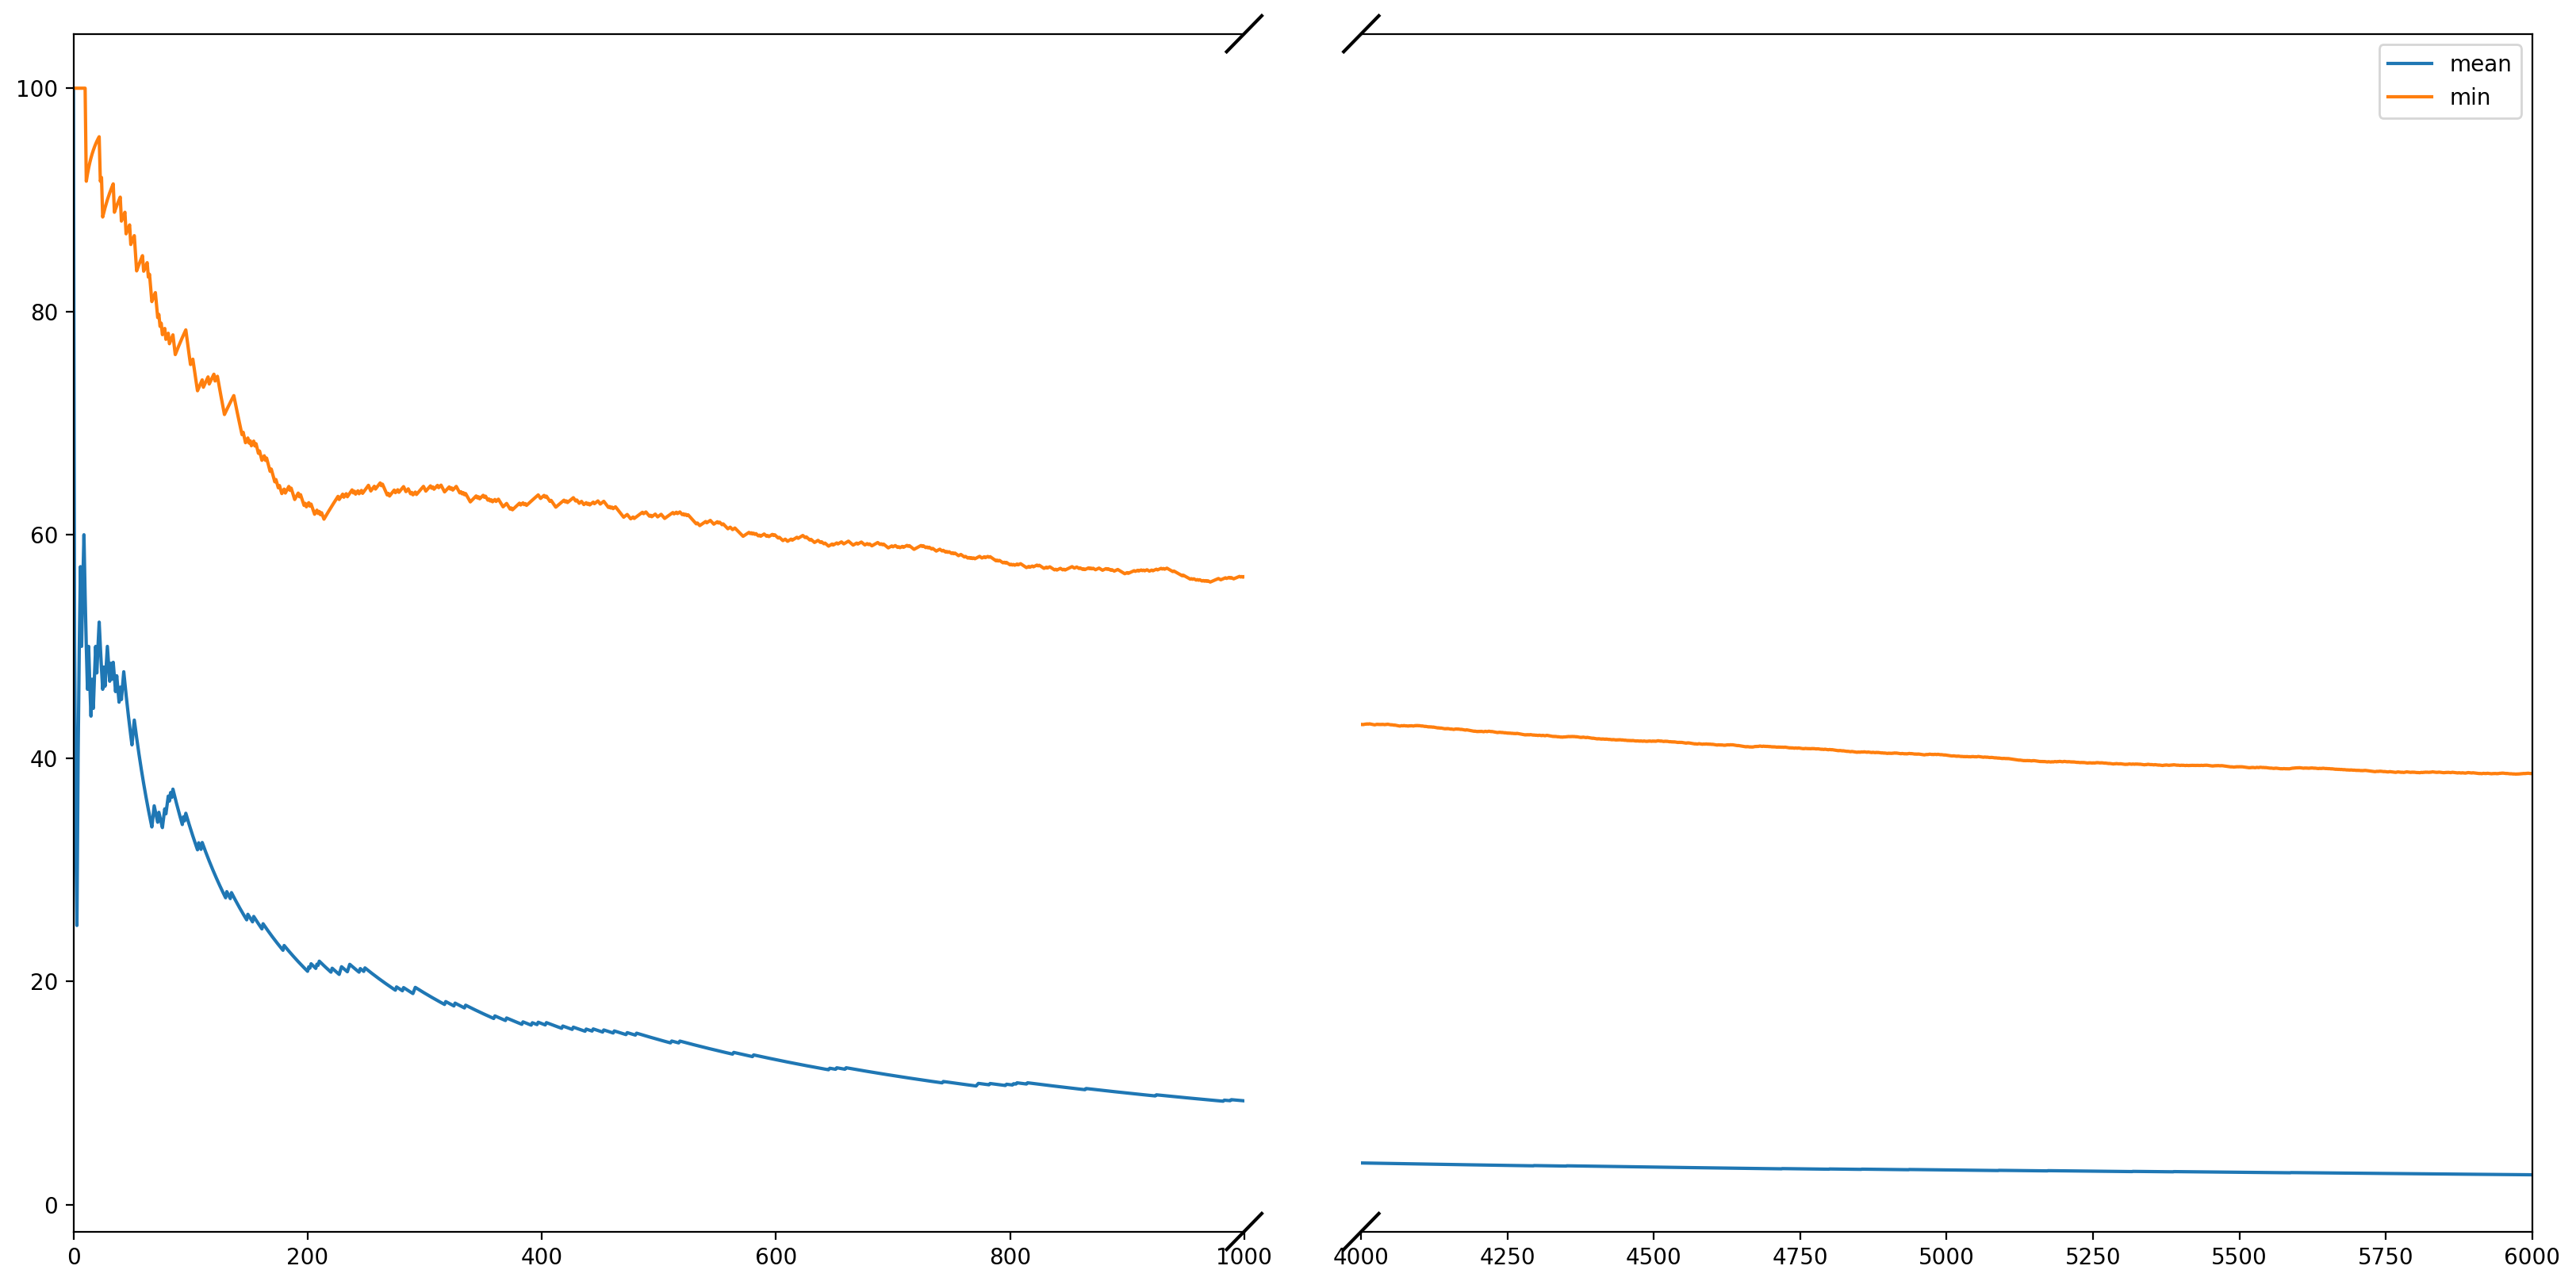

In [83]:
# https://matplotlib.org/2.0.2/examples/pylab_examples/broken_axis.html

fig, (ax, ax2) = plt.subplots(1, 2, figsize=(20,10), dpi=200, facecolor='w', edgecolor='k', sharey=True)
fig.subplots_adjust(wspace=0.1)

ax.plot(list(percentages_mean))
ax.plot(list(percentages_min))
# ax.yticks(np.linspace(0,100,41))
# ax.ylabel('percentage % better then nonfoveated')
# ax.xlabel('cutoff range')
# ax.legend(['mean', 'min'])
ax.set_xlim(0, 1000)
ax.spines['right'].set_visible(False)
ax.yaxis.tick_left()

ax2.plot(list(percentages_mean))
ax2.plot(list(percentages_min))
# ax.yticks(np.linspace(0,100,41))
# ax.ylabel('percentage % better then nonfoveated')
# ax.xlabel('cutoff range')
ax2.legend(['mean', 'min'])
ax2.set_xlim(4000,6000)
ax2.spines['left'].set_visible(False)
ax2.tick_params(left=False)  # don't put tick labels at the left

d = .015  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)
ax.plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d), **kwargs)  # bottom-left diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, 1 + d), **kwargs)  # top right diagonal
ax2.plot((-d, +d), (-d, +d), **kwargs)  # bottom-right diagonal


plt.show()

## Random, center, and min

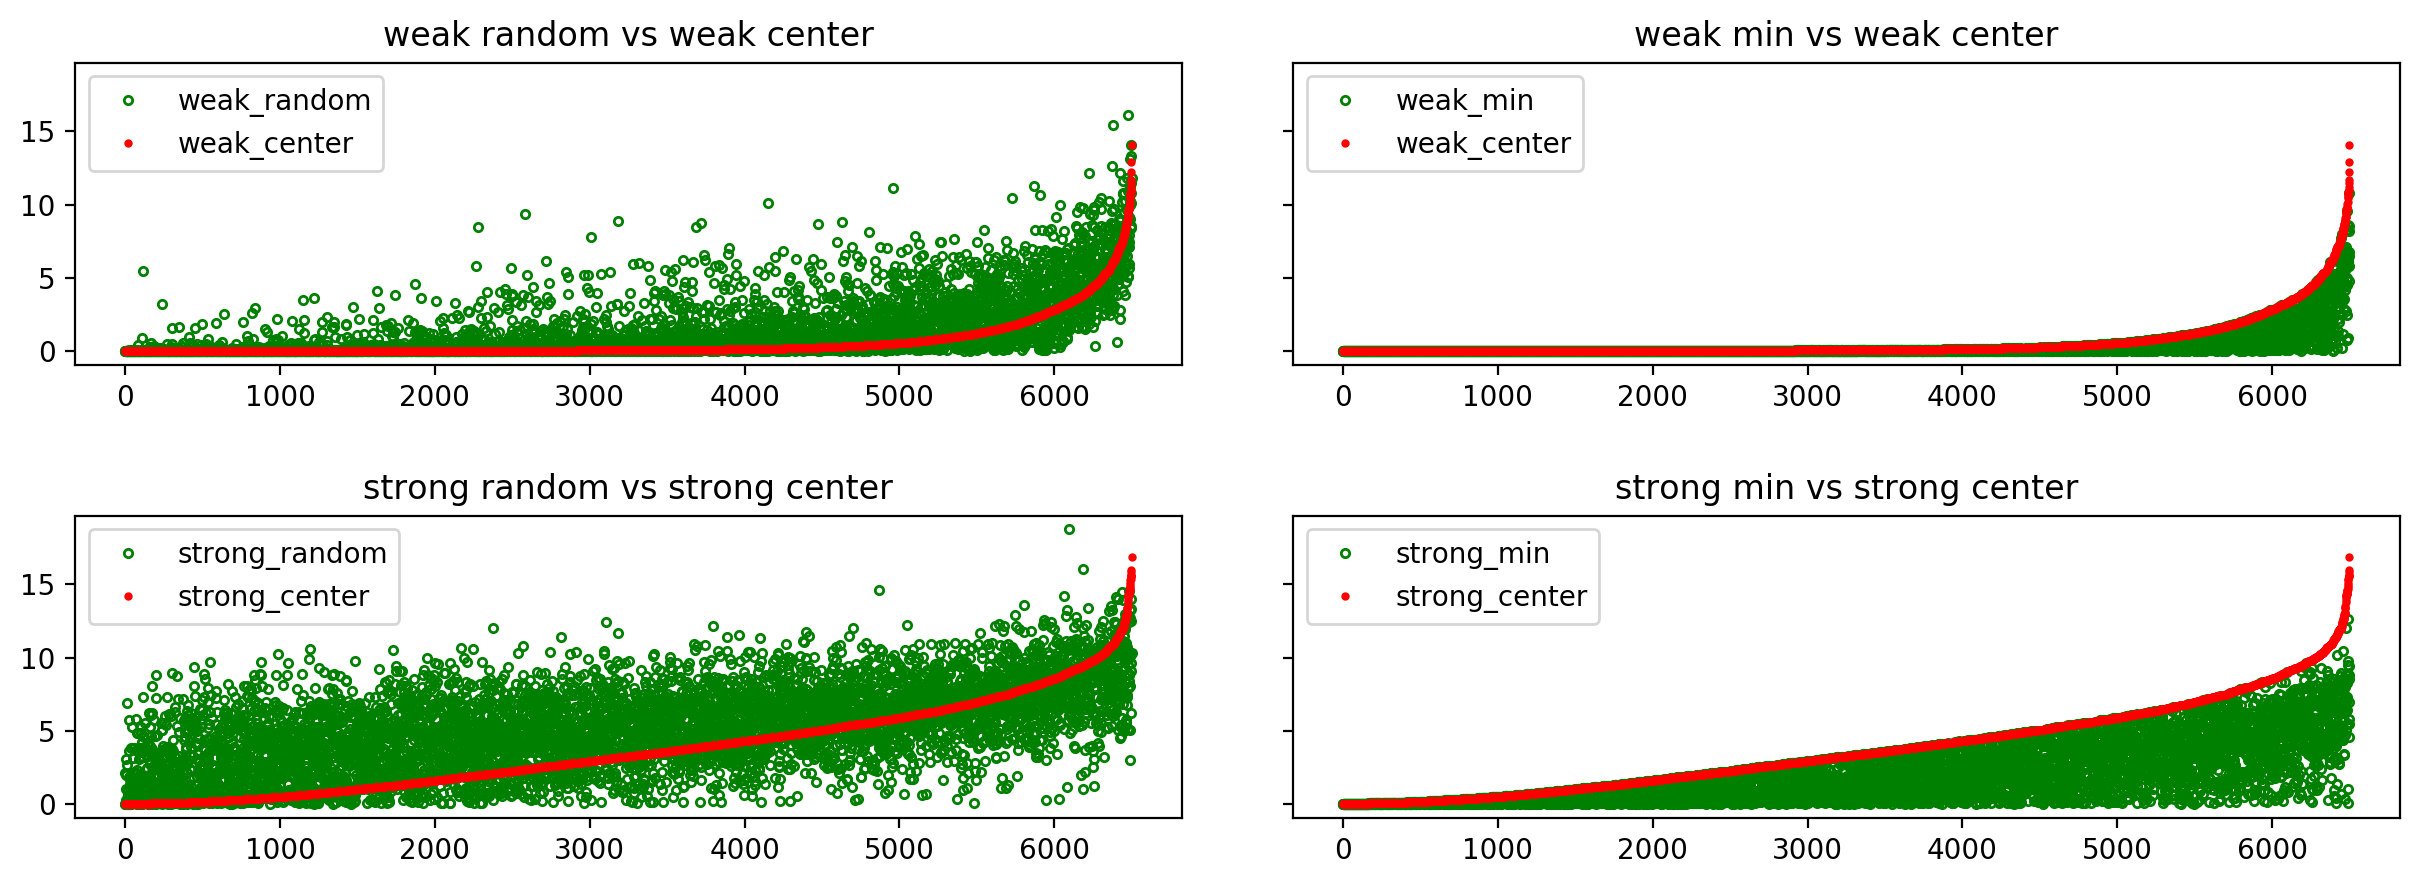

In [5]:
fig, ax = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(15,5), dpi=200)
fig.subplots_adjust(wspace=0.1, hspace=0.5)

"WEAK"
result = df.sort_values('weak_center')
result = result.reset_index(drop=True)

ax00 = ax[0,0]
ax00.plot(result['weak_random'], 'go', markersize=3, fillstyle='none')
ax00.plot(result['weak_center'], 'ro', markersize=2)
ax00.xaxis.set_ticks_position('bottom')
ax00.legend(['weak_random', 'weak_center'])
ax00.set_title('weak random vs weak center')

ax01 = ax[0,1]
ax01.plot(result['weak_min'], 'go', markersize=3, fillstyle='none')
ax01.plot(result['weak_center'], 'ro', markersize=2)
ax01.xaxis.set_ticks_position('bottom')
ax01.legend(['weak_min', 'weak_center'])
ax01.set_title('weak min vs weak center')

"STRONG"
result = df.sort_values('strong_center')
result = result.reset_index(drop=True)

ax10 = ax[1,0]
ax10.plot(result['strong_random'], 'go', markersize=3, fillstyle='none')
ax10.plot(result['strong_center'], 'ro', markersize=2)
ax10.xaxis.set_ticks_position('bottom')
ax10.legend(['strong_random', 'strong_center'])
ax10.set_title('strong random vs strong center')

ax11 = ax[1,1]
ax11.plot(result['strong_min'], 'go', markersize=3, fillstyle='none')
ax11.plot(result['strong_center'], 'ro', markersize=2)
ax11.xaxis.set_ticks_position('bottom')
ax11.legend(['strong_min', 'strong_center'])
ax11.set_title('strong min vs strong center')

plt.show()

## Foveation locations of min

In [35]:
weak_min_locations = [Q_Table_weak.columns[1:][np.argmin(i[1:])] for i in Q_Table_weak.values]
strong_min_locations = [Q_Table_strong.columns[1:][np.argmin(i[1:])] for i in Q_Table_strong.values]

In [42]:
print(strong_min_locations == '(5, 3)')

False


In [50]:
strong_unique, strong_counts = np.unique(strong_min_locations, return_counts=True)
print(strong_unique)
print(strong_counts)

['(1, 1)' '(1, 3)' '(1, 5)' '(1, 7)' '(1, 9)' '(3, 1)' '(3, 3)' '(3, 5)'
 '(3, 7)' '(3, 9)' '(5, 1)' '(5, 3)' '(5, 5)' '(5, 7)' '(5, 9)' '(7, 1)'
 '(7, 3)' '(7, 5)' '(7, 7)' '(7, 9)' '(9, 1)' '(9, 3)' '(9, 5)' '(9, 7)'
 '(9, 9)']
[  62  165  194  169   49  127  561 1036  535   84  127  547 1002  507
   80   72  262  355  279   62   34   55   67   43   26]


sanity checks that foveation locations are plotted correctly

 weak [('(1, 1)', 44), ('(1, 3)', 113), ('(1, 5)', 125), ('(1, 7)', 84), ('(1, 9)', 26), ('(3, 1)', 128), ('(3, 3)', 501), ('(3, 5)', 607), ('(3, 7)', 311), ('(3, 9)', 52), ('(5, 1)', 168), ('(5, 3)', 788), ('(5, 5)', 1053), ('(5, 7)', 479), ('(5, 9)', 106), ('(7, 1)', 120), ('(7, 3)', 492), ('(7, 5)', 603), ('(7, 7)', 275), ('(7, 9)', 60), ('(9, 1)', 43), ('(9, 3)', 84), ('(9, 5)', 140), ('(9, 7)', 68), ('(9, 9)', 30)]

 strong [('(1, 1)', 62), ('(1, 3)', 165), ('(1, 5)', 194), ('(1, 7)', 169), ('(1, 9)', 49), ('(3, 1)', 127), ('(3, 3)', 561), ('(3, 5)', 1036), ('(3, 7)', 535), ('(3, 9)', 84), ('(5, 1)', 127), ('(5, 3)', 547), ('(5, 5)', 1002), ('(5, 7)', 507), ('(5, 9)', 80), ('(7, 1)', 72), ('(7, 3)', 262), ('(7, 5)', 355), ('(7, 7)', 279), ('(7, 9)', 62), ('(9, 1)', 34), ('(9, 3)', 55), ('(9, 5)', 67), ('(9, 7)', 43), ('(9, 9)', 26)]

 [['(1, 1)' '(3, 1)' '(5, 1)' '(7, 1)' '(9, 1)']
 ['(1, 3)' '(3, 3)' '(5, 3)' '(7, 3)' 

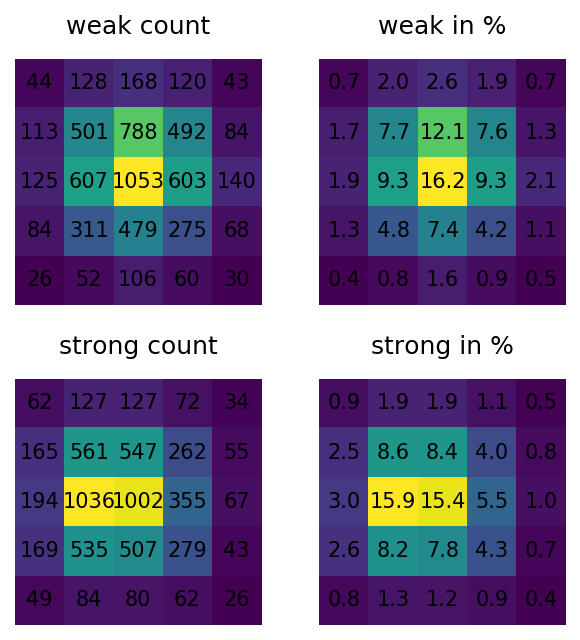

In [66]:
print("sanity checks that foveation locations are plotted correctly")
weak_unique, weak_counts = np.unique(weak_min_locations, return_counts=True)
print('\n weak', list(zip(weak_unique, weak_counts)))
weak_percentages = np.around((weak_counts / sum(weak_counts)) * 100, 2).reshape((5, 5)).transpose()
weak_unique = weak_unique.reshape((5, 5)).transpose()
weak_counts = weak_counts.reshape((5, 5)).transpose()

strong_unique, strong_counts = np.unique(strong_min_locations, return_counts=True)
print('\n strong', list(zip(strong_unique, strong_counts)))
strong_percentages = np.around((strong_counts / sum(strong_counts)) * 100, 2).reshape((5, 5)).transpose()
strong_unique = strong_unique.reshape((5, 5)).transpose()
strong_counts = strong_counts.reshape((5, 5)).transpose()

print('\n', weak_unique)

# Plot
fig, ax = plt.subplots(2, 2, figsize=(5,5), dpi=150, facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=0.1, hspace=0.3)

ax[0,0].matshow(weak_counts)
ax[0,0].axis('off')
ax[0,0].set_title('weak count')
for (i, j), z in np.ndenumerate(weak_counts):
    ax[0,0].text(j, i, '{}'.format(z), ha='center', va='center')
    
ax[0,1].matshow(weak_percentages)
ax[0,1].axis('off')
ax[0,1].set_title('weak in %')
for (i, j), z in np.ndenumerate(weak_percentages):
    ax[0,1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
ax[1,0].matshow(strong_counts)
ax[1,0].axis('off')
ax[1,0].set_title('strong count')
for (i, j), z in np.ndenumerate(strong_counts):
    ax[1,0].text(j, i, '{}'.format(z), ha='center', va='center')
    
ax[1,1].matshow(strong_percentages)
ax[1,1].axis('off')
ax[1,1].set_title('strong in %')
for (i, j), z in np.ndenumerate(strong_percentages):
    ax[1,1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

## What are good/bad images to foveate?

In [8]:
total = 6500

better_locations = []
equal_locations = []
worse_locations = []

better_class = []
equal_class = []
worse_class = []

better_imagenames = []
equal_imagenames = []
worse_imagenames = []

for (i, row1), (i, row2) in zip(Q_Table_weak.iterrows(), temp.iterrows()):
       
    lowest_value = row1[1:].min()
    lowest_location = pd.to_numeric(row1[1:]).idxmin()
    image_name = row1[0]
    image_class = image_name.split('_')[0]
    
    # better performance
    if lowest_value < row2['nonfoveated']:
        better_locations.append(lowest_location)
        better_class.append(image_class)
        better_imagenames.append(image_name)
    # equal performance
    elif lowest_value == row2['nonfoveated']:
        equal_locations.append(lowest_location)
        equal_class.append(image_class)
        equal_imagenames.append(image_name)
    # worse performance
    elif lowest_value > row2['nonfoveated']:
        worse_locations.append(lowest_location)
        worse_class.append(image_class)
        worse_imagenames.append(image_name)
    else:
        print("the universe exploded")
        break
        
print('Better performance of foveated images then non-foveated on the 6500 test images: %d %%' % (
100 * len(better_locations) / total))
print('Worse performance of foveated images then non-foveated on the 6500 test images: %d %%' % (
100 * len(worse_locations) / total))

NameError: name 'temp' is not defined

### Locations

In [ ]:
better_unique, better_counts = np.unique(better_locations, return_counts=True)
better_percentages = np.around((better_counts / sum(better_counts)) * 100, 2).reshape((5, 5))

# equal_unique, equal_counts = np.unique(equal_locations, return_counts=True)
# equal_percentages = np.around((equal_counts / sum(equal_counts)) * 100, 2).reshape((5, 5))

worse_unique, worse_counts = np.unique(worse_locations, return_counts=True)
worse_percentages = np.around((worse_counts / sum(worse_counts)) * 100, 2).reshape((5, 5))

# Plot
fig, ax = plt.subplots(3, 2, figsize=(10,10), dpi=200, facecolor='w', edgecolor='k')
fig.subplots_adjust(wspace=0.1, hspace=0.3)

ax[0,0].matshow(better_counts.reshape((5, 5)))
ax[0,0].axis('off')
ax[0,0].set_title('better count')
for (i, j), z in np.ndenumerate(better_counts.reshape((5, 5))):
    ax[0,0].text(j, i, '{}'.format(z), ha='center', va='center')
    
ax[0,1].matshow(better_percentages)
ax[0,1].axis('off')
ax[0,1].set_title('better in %')
for (i, j), z in np.ndenumerate(better_percentages):
    ax[0,1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
# ax[1,0].matshow(equal_counts.reshape((5, 5)))
# ax[1,0].axis('off')
# ax[1,0].set_title('equal count')
# for (i, j), z in np.ndenumerate(equal_counts.reshape((5, 5))):
#     ax[1,0].text(j, i, '{}'.format(z), ha='center', va='center')
    
# ax[1,1].matshow(equal_percentages)
# ax[1,1].axis('off')
# ax[1,1].set_title('equal in %')
# for (i, j), z in np.ndenumerate(equal_percentages):
#     ax[1,1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
    
ax[2,0].matshow(worse_counts.reshape((5, 5)))
ax[2,0].axis('off')
ax[2,0].set_title('worse count')
for (i, j), z in np.ndenumerate(worse_counts.reshape((5, 5))):
    ax[2,0].text(j, i, '{}'.format(z), ha='center', va='center')
    
ax[2,1].matshow(worse_percentages)
ax[2,1].axis('off')
ax[2,1].set_title('worse in %')
for (i, j), z in np.ndenumerate(worse_percentages):
    ax[2,1].text(j, i, '{:0.1f}'.format(z), ha='center', va='center')

### Classes

In [ ]:
better_unique, better_counts = np.unique(better_class, return_counts=True)
better_percentages = np.around((better_counts / sum(better_counts)) * 100, 2)

worse_unique, worse_counts = np.unique(worse_class, return_counts=True)
worse_percentages = np.around((worse_counts / sum(worse_counts)) * 100, 2)

fig=plt.figure(dpi=200, facecolor='w', edgecolor='k')
plt.hist([better_class, worse_class])
plt.title('classes')
plt.legend(['better performance', 'worse performance'])
plt.xlabel('class')
plt.ylabel('frequency')
plt.show()

### Images

In [ ]:
# print(better_imagenames)
# print(worse_imagenames)


